In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
import warnings

In [ ]:
warnings.filterwarnings('ignore')

# Plan
  
* Explore the data and experiment with clustering algorithms such as K-means and hierarchical clustering on the dataset that contains users' average ratings of their Google reviews for various attractions.    
* Implement Principal Component Analysis for dimensionality reduction and compare the results.     
* Visualize the clusters.    

By analyzing people' past activities and preferences, we would be able to highlight (marketing) and/or recommend attractions and activities that match their interests.   

# The Data

## First look
Source of the dataset: https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings#

In [ ]:
df = pd.read_csv('google_review_ratings.csv')

In [ ]:
display(df.head())
display(df.tail())

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN
5455,User 5456,0.95,4.07,5.00,2.82,2.80,2.57,2.42,1.02,1.74,...,0.64,0.62,0.63,0.78,5.00,1.08,5.0,5.0,1.17,NaN


## Dataset features    
Features <font color='blue'>["Category n"]</font> represent the user rating on various attractions captured from Google reviews. The rating range was from 1 to 5, and respective averages were calculated for each user.
* User : Unique user id
* Attribute 2 : Average ratings on <font color='blue'>churches</font>
* Attribute 3 : Average ratings on <font color='blue'>resorts</font>
* Attribute 4 : Average ratings on <font color='blue'>beaches</font>
* Attribute 5 : Average ratings on <font color='blue'>parks</font>
* Attribute 6 : Average ratings on <font color='blue'>theatres</font>
* Attribute 7 : Average ratings on <font color='blue'>museums</font>
* Attribute 8 : Average ratings on <font color='blue'>malls</font>
* Attribute 9 : Average ratings on <font color='blue'>zoo</font>
* Attribute 10 : Average ratings on <font color='blue'>restaurants</font>
* Attribute 11 : Average ratings on <font color='blue'>pubs/bars</font>
* Attribute 12 : Average ratings on <font color='blue'>local services</font>
* Attribute 13 : Average ratings on <font color='blue'>burger/pizza shops</font>
* Attribute 14 : Average ratings on <font color='blue'>hotels/other lodgings</font>
* Attribute 15 : Average ratings on <font color='blue'>juice bars</font>
* Attribute 16 : Average ratings on <font color='blue'>art galleries</font>
* Attribute 17 : Average ratings on <font color='blue'>dance clubs</font>
* Attribute 18 : Average ratings on <font color='blue'>swimming pools</font>
* Attribute 19 : Average ratings on <font color='blue'>gyms</font>
* Attribute 20 : Average ratings on <font color='blue'>bakeries</font>
* Attribute 21 : Average ratings on <font color='blue'>beauty & spas</font>
* Attribute 22 : Average ratings on <font color='blue'>cafes</font>
* Attribute 23 : Average ratings on <font color='blue'>view points</font>
* Attribute 24 : Average ratings on <font color='blue'>monuments</font>
* Attribute 25 : Average ratings on <font color='blue'>gardens</font>

In [ ]:
# Rows represent unique users
print(f"There are {df.shape[0]} users in total.")

There are 5456 users in total


# IDA

In [ ]:
col_newnames = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza', 'hotels', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens','Unnamed: 25']
df.columns = col_newnames

In [ ]:
# Defining a function to provide an overview of the dataset's key characteristics

def explore_dataframe(df):
    print(f"\nShape of the df: {df.shape}")

    #Displaying and counting different data types present in the dataset
    type_counts = df.dtypes.value_counts()
    print(f"\nThere are {len(type_counts)} unique data types, such as:")
    for i, v in type_counts.items():
        print(f"{i}\t{v}") # iterating only through the key-value pairs for visually better output

    #Identifying missing values and calculating its amount
    missing_values = df.isnull().sum()
    num_missing = missing_values.sum()
    if num_missing == 0:
        print(f"\nThere are no missing values.")
    else:
        print(f"\n{num_missing} missing values")

In [ ]:
explore_dataframe(df)


Shape of the df: (5456, 26)

There are 2 unique data types, such as:
float64	24
object	2

5456 missing values


### Observations
Some of our preproccesing tasks are already obvious:
1. Investigate what missing values are related to.
2. Data type conversion should take place as we want to process numeric data.

## Distributions   

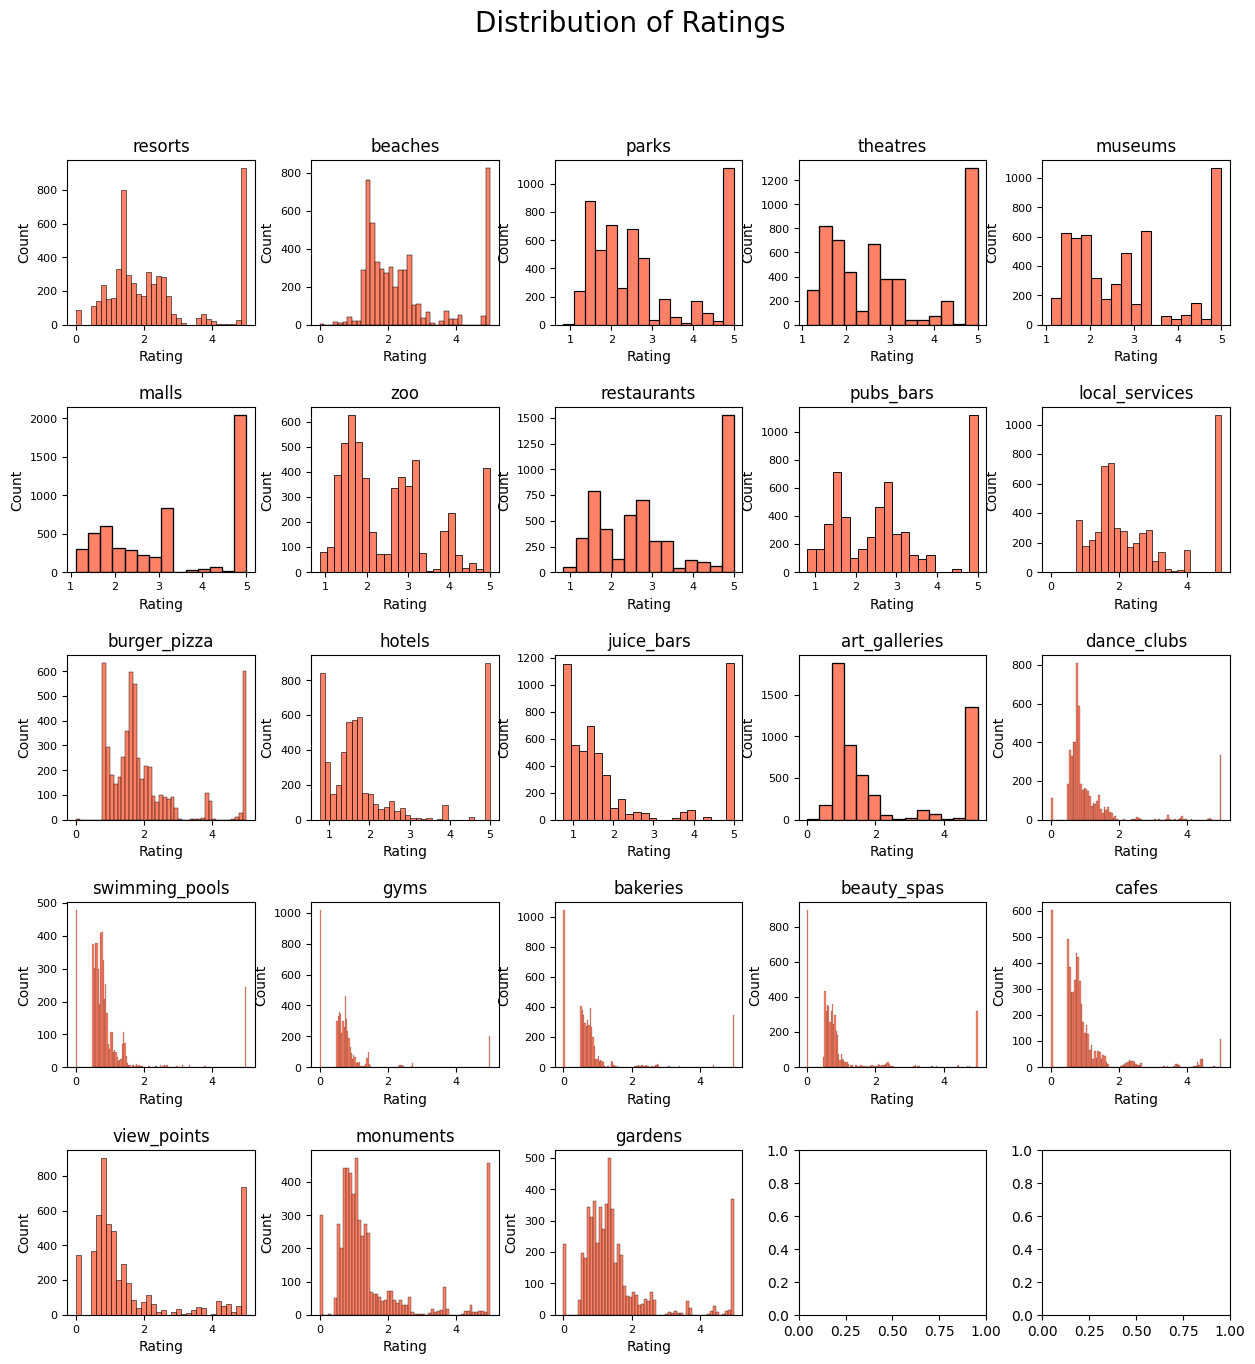

In [ ]:
rating_cols = df.columns[1:25]  # Omitting the "User" column

# Creating a grid of subplots
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
axs = axs.flatten()
for i, col in enumerate(rating_cols):
    sns.histplot(df[col], ax=axs[i], color='#FF5733')
    axs[i].set_title(col, fontsize=12)
    axs[i].set_xlabel('Rating', fontsize=10)
    axs[i].set_ylabel('Count', fontsize=10)
    axs[i].tick_params(labelsize=8)

fig.suptitle('Distribution of Ratings', fontsize=20)
fig.set_facecolor('white')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show();

### Observations   
1. We can see that rating distributions vary for each category. Some distributions are also highly asymmetrical/skewed.
2. Some distributions visually suggest presence of large number of outliers.

## Stats   
Descriptive statistics of our DataFrame:

In [ ]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


Let's also see which are the least and most popular attractions in terms of <b>rating feedback</b>:

In [ ]:
df_cols = df.columns[1:25]
counts = df[df_cols[:]].astype(bool).sum(axis=0).sort_values()
print(counts)

bakeries          4410
gyms              4439
beauty_spas       4560
cafes             4852
swimming_pools    4977
view_points       5111
monuments         5154
gardens           5230
dance_clubs       5344
resorts           5366
art_galleries     5452
beaches           5452
burger_pizza      5455
local_services    5455
pubs_bars         5456
juice_bars        5456
restaurants       5456
zoo               5456
malls             5456
museums           5456
theatres          5456
parks             5456
hotels            5456
dtype: int64


### Observations   
1. We can note from the mean values that people tend to rate <font color='blue'>[malls], [restaurants], [theatres]</font> the highest, while <font color='blue'>[gyms], [swimming pools], [bakeries]</font> have the lowest average rating.
2. <font color='blue'>[art galleries]</font> have the highest standard deviation. This observation is not surprising as art and art preferences are highly subjective, making it reasonable for people to have diverse opinions and submit ratings that differ significantly.
3. People are least interested in rating <font color='blue'>[bakeries]</font> and <font color='blue'>[gyms]</font>. As we could see from our earlier observation, if they do they rate it relatively low.

# EDA, Preprocessing

## Cleaning the data

### 1: addressing missing values   

In [ ]:
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct)

User               0.000000
churches           0.000000
resorts            0.000000
beaches            0.000000
parks              0.000000
theatres           0.000000
museums            0.000000
malls              0.000000
zoo                0.000000
restaurants        0.000000
pubs_bars          0.000000
local_services     0.000000
burger_pizza       0.018328
hotels             0.000000
juice_bars         0.000000
art_galleries      0.000000
dance_clubs        0.000000
swimming_pools     0.000000
gyms               0.000000
bakeries           0.000000
beauty_spas        0.000000
cafes              0.000000
view_points        0.000000
monuments          0.000000
gardens            0.018328
Unnamed: 25       99.963343
dtype: float64


The feature ['Unnamed: 25'] has ~99% of values missing so it will be subjected to drop().  
In this step I'm also dropping the column ['User'] as it's basically repeating the index and doesn't consist of any relevant identifiers. </div>

In [ ]:
df = df.drop(['Unnamed: 25', "User"], axis=1)

Columns <font color='blue'>[burger_pizza], [gardens]</font> also indicated a couple of values missing.    
My decision was to replace them with '0' as in this dataset's convention it would imply that the user did not review those attractions.

In [ ]:
df.fillna(0, inplace=True)

### 2: type conversion   

In [ ]:
print(df.dtypes)

churches          float64
resorts           float64
beaches           float64
parks             float64
theatres          float64
museums           float64
malls             float64
zoo               float64
restaurants       float64
pubs_bars         float64
local_services     object
burger_pizza      float64
hotels            float64
juice_bars        float64
art_galleries     float64
dance_clubs       float64
swimming_pools    float64
gyms              float64
bakeries          float64
beauty_spas       float64
cafes             float64
view_points       float64
monuments         float64
gardens           float64
dtype: object


In [ ]:
print(df['local_services'])

0        1.7
1        1.7
2        1.7
3       1.73
4        1.7
        ... 
5451    1.02
5452    1.01
5453    0.99
5454    0.97
5455    0.95
Name: local_services, Length: 5456, dtype: object


In [ ]:
# handling non-numeric values
df['local_services'] = pd.to_numeric(df['local_services'], errors='coerce')
# converting the data type of the column to float
df['local_services'] = df['local_services'].astype(float)
df.fillna(0, inplace=True)

In [ ]:
explore_dataframe(df) #checking if our data cleaning went successfull


Shape of the df: (5456, 24)

There are 1 unique data types, such as:
float64	24

There are no missing values.


In [ ]:
display(df.head())

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


## Scaling  
It's counterintuitive to scale our data as it is already in a fixed range by its nature. However, we will still save its scaled version in case this technique will prove to make any difference.

In [ ]:
df_scaled = StandardScaler().fit_transform(df)

In [ ]:
df_filtered_scaled = StandardScaler().fit_transform(df_filtered)

# Clustering

## K-means

### Choosing the best k parameter: elbow point and silhouette

In [ ]:
# Defining a function to calculate silhoutte score and inertia for k in range of 2-10; max 10 as we want a reasonable number of clusters for our domain
def silhouette_elbow_kmeans(df):
    silhouette = []
    inertia_values = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        labels = kmeans.labels_
        silhouette.append(silhouette_score(df, labels))
        inertia_values.append(kmeans.inertia_)
    print(f"Max silhouette = {round(max(silhouette), 3)} and obtained with the K = {silhouette.index(max(silhouette)) + 2}")
    knee = KneeLocator(range(2, 10), inertia_values, curve='convex', direction='decreasing')
    elbow_point = knee.elbow
    print(f"Inertia value at elbow point = {inertia_values[elbow_point-2]:.2f} obtained with K = {elbow_point}")
    return silhouette, inertia_values

In [ ]:
# Defining a function to plot 2 elbow curves so they can be visually inspected and compared
def plot_elbow(orig, modded, legend_str):
    plt.plot(range(2, 10), orig, label=f'Before {legend_str}', marker='o')
    plt.plot(range(2, 10), modded, label=f'After {legend_str}', marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow curve comparison')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# Same but for silhouette
def plot_silhouette(orig, modded, legend_str):
    plt.plot(range(2, 10), orig, label=f'Before {legend_str}', marker='o')
    plt.plot(range(2, 10), modded, label=f'After {legend_str}', marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score comparison')
    plt.legend()
    plt.grid()
    plt.show()

### Should we use scaled or unmodified data?

In [ ]:
silhouette_unscaled, inertia_unscaled = silhouette_elbow_kmeans(df)

Max silhouette = 0.156 and obtained with the K = 7
Inertia value at elbow point = 141517.48 obtained with K = 5


In [ ]:
silhouette_scaled, inertia_scaled = silhouette_elbow_kmeans(df_scaled)

Max silhouette = 0.153 and obtained with the K = 2
Inertia value at elbow point = 92075.44 obtained with K = 4


* Visualization:

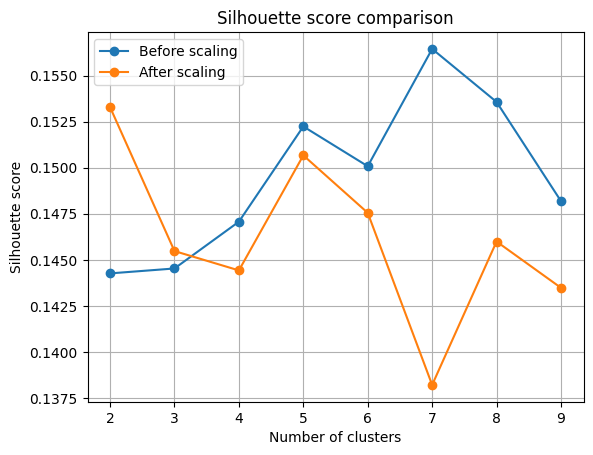

In [ ]:
plot_silhouette(silhouette_unscaled, silhouette_scaled, 'scaling')

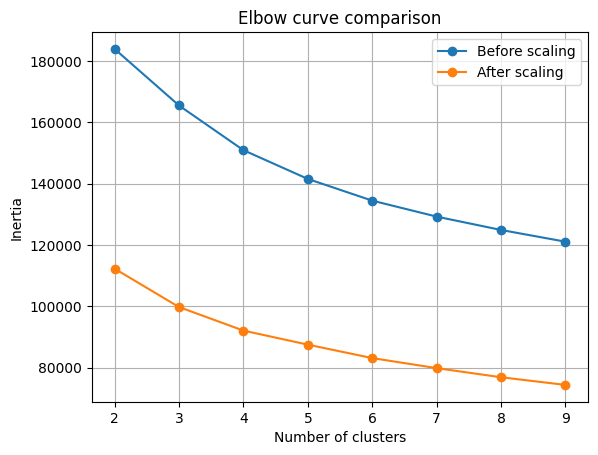

In [ ]:
plot_elbow(inertia_unscaled, inertia_scaled, 'scaling')

* Observations
  * Neither scaled nor unscaled data has a good silhouette score with any k we tried (range of the score value varies by ~0.02 only).    
  * Visually there is no clear elbow point, while the difference between the two inertia values for the points we detected with the KneeLocator is not particularly large either.

In [ ]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(df_scaled)
labels_4 = kmeans_4.predict(df_scaled)

## HAC

### Plotting dendrograms

In [ ]:
def plot_dendrogram(D, method, distance):
    fig = plt.figure(figsize=(15, 6))
    dn = dendrogram(D)
    plt.title(f'Dendrogram with {distance} distance (method: {method})')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

At this stage, I explored various combinations of methods and distance metrics to generate dendrograms that could help me determine the optimal number of clusters.   
As a result, below I am including the two dendrograms that provided the clearest and most interpretable visualizations, with less overlapping clusters compared to the other methods.

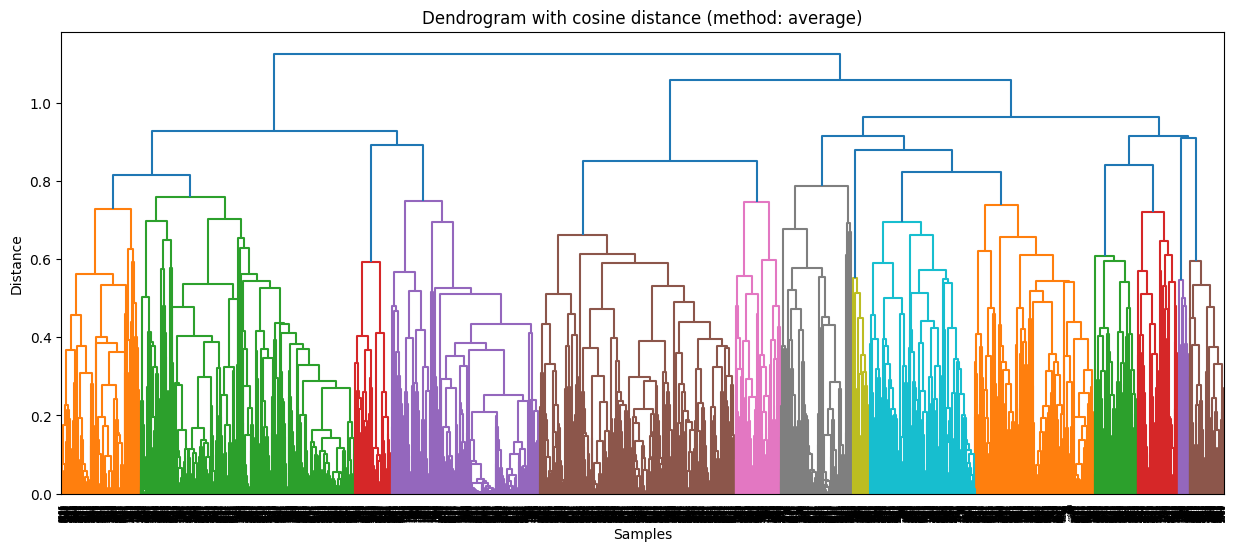

In [ ]:
C = linkage(df_scaled, method='average', metric='cosine')
plot_dendrogram(C, 'average', "cosine")

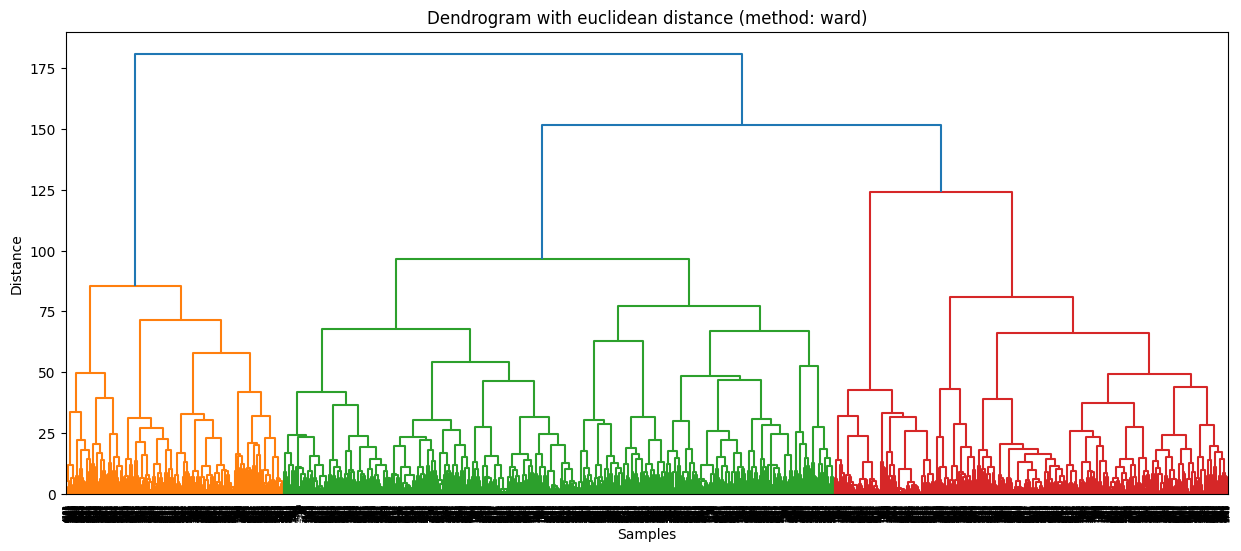

In [ ]:
W = linkage(df_scaled, method='ward', metric='euclidean')
plot_dendrogram(W, 'ward', "euclidean")

### Testing the parameters

In [ ]:
# Identifying the number of clusters resulted from the desired cut distance

def get_num_clusters(D, cut_distance):
    cluster_labels = fcluster(D, t=cut_distance, criterion='distance')
    num_clusters = len(set(cluster_labels))
    print("Number of clusters:", num_clusters)

In [ ]:
# Function to perform the HAC clustering

def run_HAC(n_clusters, linkage, distance, df):
   model = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance, linkage=linkage)
   y_hac = model.fit_predict(df)
   df_hac = pd.DataFrame(df, columns=[f"col_{i}" for i in range(df.shape[1])])
   df_hac['HACLabels'] = y_hac
   return y_hac, df_hac

In [ ]:
# Calculating 3 clustering quality metrics with the functions defined in sklearn.metrics

def quality_metrics(df, clustered_df, distance):
   silhouette = silhouette_score(df, clustered_df, metric=distance)
   print(f"Silhouette Coefficient for {distance}: {silhouette:.3f}")
   ch_score = calinski_harabasz_score(df, clustered_df) # we want it as high as possible
   print(f"Calinski-Harabasz Index: {ch_score:.2f}")
   dbi = davies_bouldin_score(df, clustered_df) # we want it as close to 0 as possible
   print(f"Davies-Bouldin Index with {distance} distance: {dbi:.3f}")

For the ward method cutting our dendrogram at ~110 provided the best clustering results according to our metrics:

In [ ]:
get_num_clusters(W, 110)
hac_ward, df_hac_ward = run_HAC(4, "ward", "euclidean", df_scaled)
quality_metrics(df, hac_ward, "euclidean")

Number of clusters: 4
Silhouette Coefficient for euclidean: 0.128
Calinski-Harabasz Index: 651.17
Davies-Bouldin Index with euclidean distance: 2.132


For the average method with cosine distance the best cut ended up to be at ~0.96, resulting in 3 clusters:

In [ ]:
get_num_clusters(C, 0.962)
cos_hac, cos_df_hac = run_HAC(3, 'average', "cosine", df_scaled)
quality_metrics(df_scaled, cos_hac, "cosine")

Number of clusters: 3
Silhouette Coefficient for cosine: 0.222
Calinski-Harabasz Index: 771.58
Davies-Bouldin Index with cosine distance: 2.334


#  Dimensionality Reduction

In [ ]:
# Creating transformation matrix
pca=PCA()
pca_transformed=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(pca_transformed)

### Explained variance  
At this stage we will plot the explained variance for principal components as well as the accumulated explained variance to determine a reasonable number of dimensions:

In [ ]:
expl_var=pca.explained_variance_ratio_

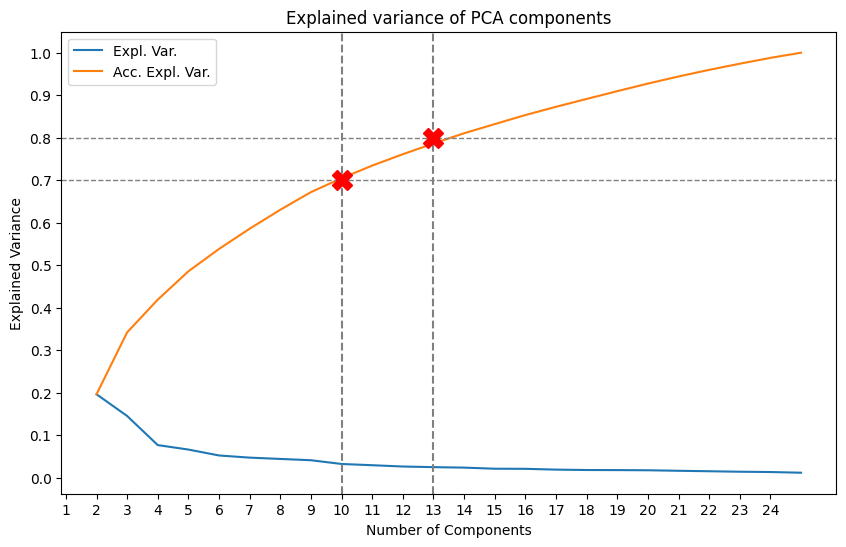

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, len(expl_var) + 1), y=expl_var, ax=ax, label='Expl. Var.')
sns.lineplot(x=range(1, len(expl_var) + 1), y=np.add.accumulate(expl_var), ax=ax, label='Acc. Expl. Var.')
ax.axhline(y=0.7, linestyle='--', color='gray', linewidth=1)
ax.axhline(y=0.8, linestyle='--', color='gray', linewidth=1)
plt.axvline(x=12, color='gray', linestyle='--')
plt.axvline(x=9, color='gray', linestyle='--')
y_ticks = np.arange(0, 1.1, 0.1)
ax.set_yticks(y_ticks)
plt.xticks(range(len(expl_var)), range(1, len(expl_var) + 1))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Explained Variance')
ax.set_title('Explained variance of PCA components')
ax.legend()
plt.plot(9, 0.7, 'X', markersize=15, color='red')
plt.plot(12, 0.8, 'X', markersize=15, color='red')
plt.grid(False)
plt.show();

### Observations
As seen with "X" marks representing intersection points, with 13 components we would keep around 80% of our data variance, while with 10  ~70%.    
Reducing our dimensions from 24 to 10 components, more than by half, still allows for a comprehensive representation of the original data.

In [ ]:
pca_10 = pca_transformed[:, :10]
df_pca_10=pd.DataFrame(pca_10)

# Clustering II

## K-means  
Once again looking for optimal parameters now that we applied PCA technique to our data:

In [ ]:
silhouette_pca, inertia_pca = silhouette_elbow_kmeans(pca_10)

Max silhouette = 0.215 and obtained with the K = 5
Inertia value at elbow point = 57417.54 obtained with K = 4


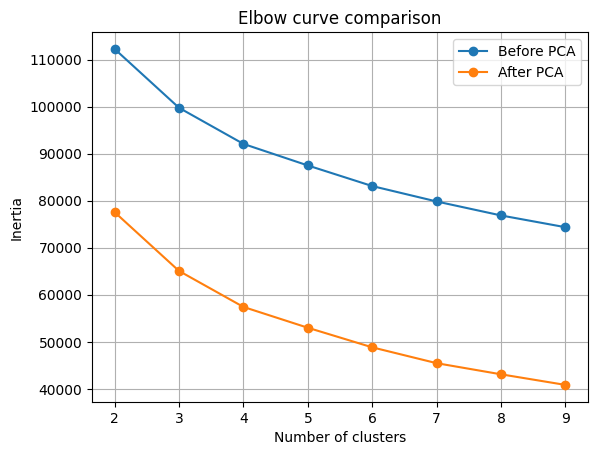

In [ ]:
plot_elbow(inertia_scaled, inertia_pca, 'PCA')


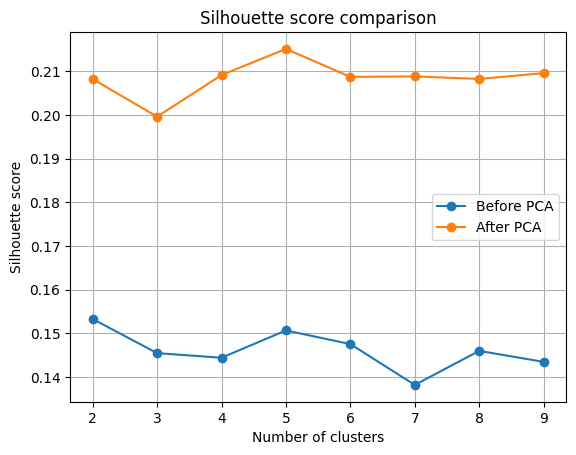

In [ ]:
plot_silhouette(silhouette_scaled, silhouette_pca, 'PCA')

### Decision
We will go with k = 5 for our PCA clustering:

In [ ]:
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(pca_10)
labels_pca = kmeans_pca.predict(pca_10)

### Clustering quality comparison

In [ ]:
print("Before PCA:")
quality_metrics(df_scaled, kmeans_4.labels_, "euclidean")
print("\nAfter PCA:")
quality_metrics(pca_10, kmeans_pca.labels_, "euclidean")

Before PCA:
Silhouette Coefficient for euclidean: 0.144
Calinski-Harabasz Index: 767.17
Davies-Bouldin Index with euclidean distance: 2.063

After PCA:
Silhouette Coefficient for euclidean: 0.215
Calinski-Harabasz Index: 1110.64
Davies-Bouldin Index with euclidean distance: 1.539


## HAC

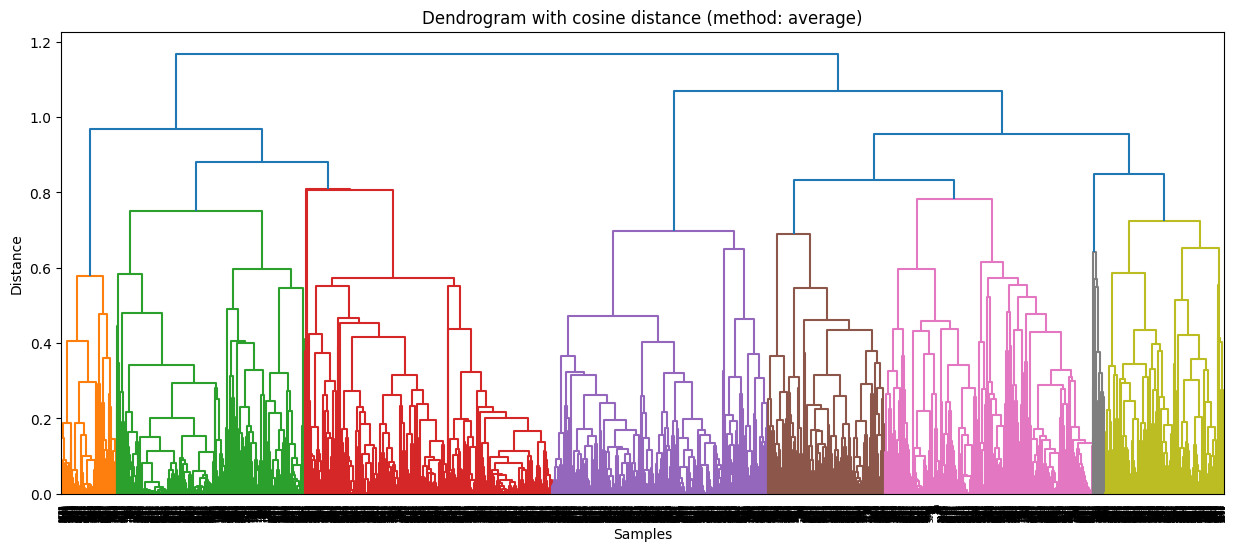

In [ ]:
C_new = linkage(pca_10, method='average', metric='cosine')
plot_dendrogram(C_new, 'average', "cosine")

### Observations   
The new dendrogram color-map sugests 6-7 distinctive clusters if we cut at around 0.85.

In [ ]:
get_num_clusters(C_new, 0.85)

Number of clusters: 6


### Clustering quality comparison

In [ ]:
pca_hac, df_pca_hac = run_HAC(6, "average", "cosine", pca_10)
print("Before PCA:")
quality_metrics(df_scaled, cos_hac, "cosine")
print("\nAfter PCA:")
quality_metrics(pca_10, pca_hac, "cosine")

Before PCA:
Silhouette Coefficient for cosine: 0.222
Calinski-Harabasz Index: 771.58
Davies-Bouldin Index with cosine distance: 2.334

After PCA:
Silhouette Coefficient for cosine: 0.314
Calinski-Harabasz Index: 873.80
Davies-Bouldin Index with cosine distance: 1.694


# Cluster Interpretation   
For our interpretation task we will stick to our k-means experiment from the Clustering II chapter (using PCA) as it displayed the best clustering quality metrics values overall. Moreover, we significantly reduced the dimensionality while preserving a substantial percentage (70%) of our data variance. Involving PCA in our experiment will also help us to visualize our clusters in 2D space.

## Visualization   
To visualize our results in 2D-space we going to use the first two principal components.   
We will also add the original features annotations to our plot accodring to their loadings, so we can interpret what we see in the original context of our dataset.

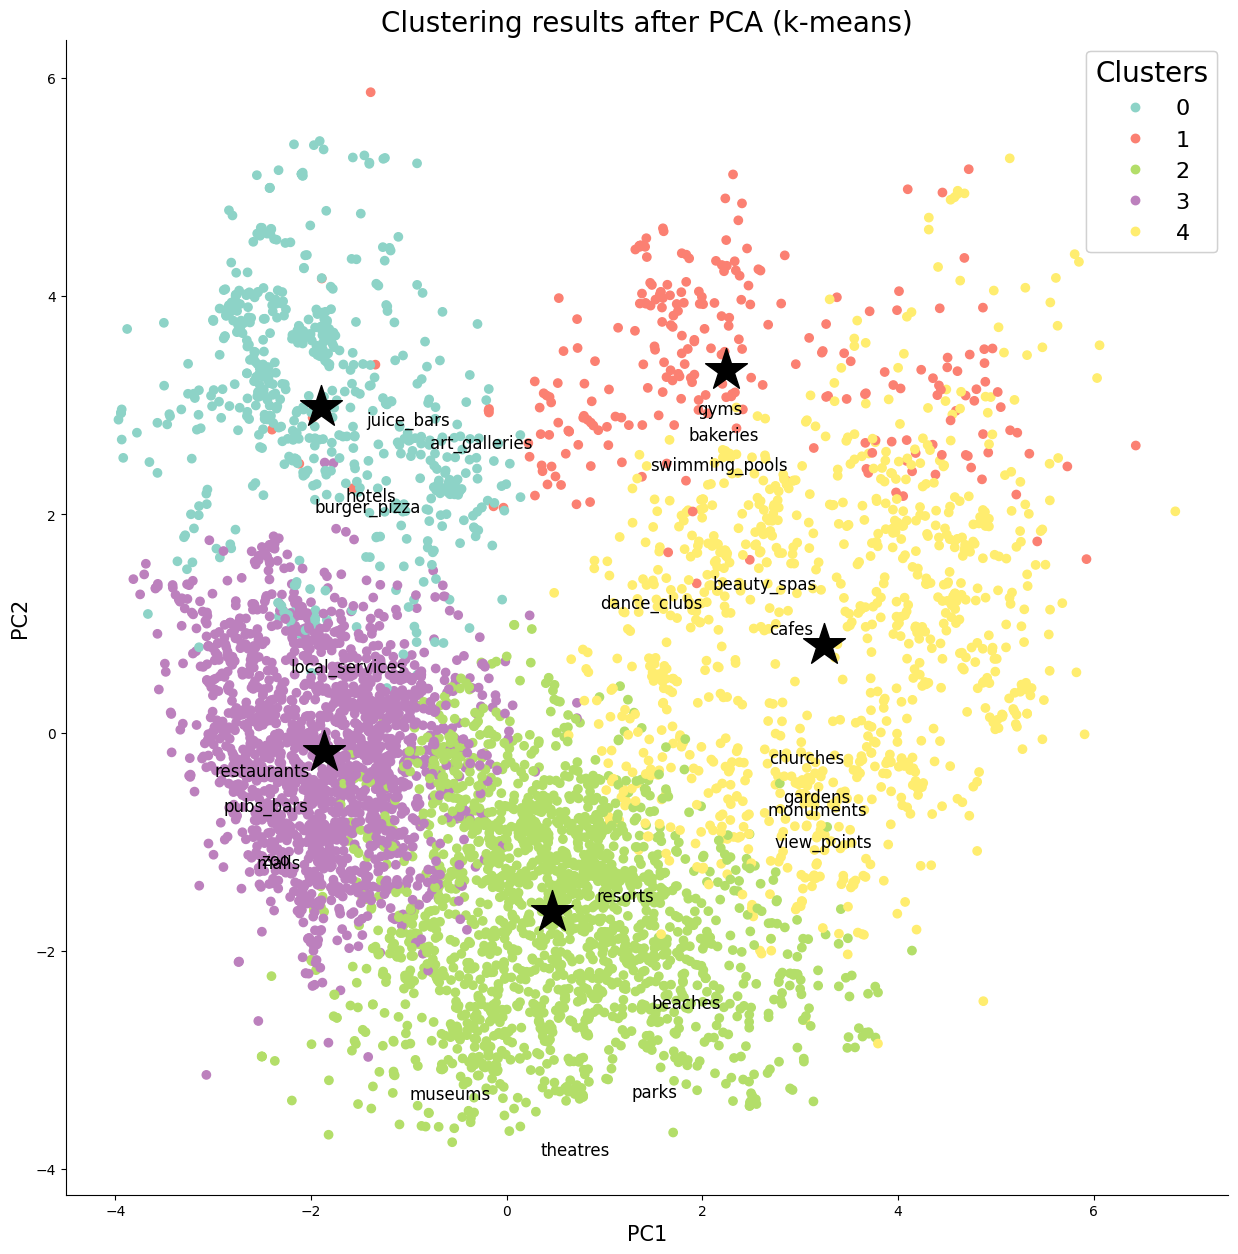

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

# Scatter plot of the first two principal components
scatter = ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=labels_pca, cmap="Set3")

# Plotting cluster centers
centers = kmeans_pca.cluster_centers_
ax.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    edgecolor='black',
    s=1000,
    marker="*")

# Plotting original features names accodring to PCA loadings
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
columns = list(df.columns)
for i in range(n):
    # Introducing offsets to try to reduce captions overlap
    x_offset = np.random.uniform(low=-0.2, high=0.2)
    y_offset = np.random.uniform(low=-0.2, high=0.2)
    ax.text(coeff[i,0]*10 + x_offset, coeff[i,1]*10 + y_offset, columns[i], size=12, color='black')

ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Clustering results after PCA (k-means)', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right",
                    title="Clusters",
                    fontsize=16,
                    title_fontsize=20)
ax.add_artist(legend)

plt.show()


## Cluster comparison and interpretation  

In [ ]:
# Counting the number of data points(users) in each cluster
cluster_counts = pd.Series(kmeans_pca.labels_).value_counts()
print(cluster_counts)

2    1847
3    1817
4     948
0     588
1     256
Name: count, dtype: int64


### Printing the highest mean features of our clusters

In [ ]:
users = list(kmeans_pca.labels_)
# Initializing an empty dictionary with keys = number of clusters of our chosen clustering
clusters = {i: [] for i in range(kmeans_pca.n_clusters)}
#  Appending the user index to the corresponding list in the clusters dictionary
for i, user in enumerate(users):
    clusters[user].append(i)

In [ ]:
#Teal-colored cluster labeled "0"
display(df.iloc[clusters[0]].mean().sort_values(ascending=False).round(2).head(5))
print("Cluster size: ", len(clusters[0]))

juice_bars        4.74
hotels            4.39
burger_pizza      4.09
art_galleries     3.88
local_services    3.27
dtype: float64

Cluster size:  588


In [ ]:
# Red cluster labeled "1"
display(df.iloc[clusters[1]].mean().sort_values(ascending=False).round(2).head(10))
print("Cluster size: ", len(clusters[1]))

swimming_pools    4.28
dance_clubs       3.44
art_galleries     3.26
gyms              3.20
juice_bars        2.81
malls             2.64
restaurants       2.27
bakeries          2.13
hotels            2.10
pubs_bars         2.10
dtype: float64

Cluster size:  256


In [ ]:
# Green cluster labeled "2"
display(df.iloc[clusters[2]].mean().sort_values(ascending=False).round(2).head(5))
print("Cluster size: ", len(clusters[2]))

theatres    4.37
parks       3.96
museums     3.71
malls       3.40
beaches     3.22
dtype: float64

Cluster size:  1847


In [ ]:
# Lilac cluster labeled "3"
display(df.iloc[clusters[3]].mean().sort_values(ascending=False).round(2).head(5))
print("Cluster size: ", len(clusters[3]))

restaurants       4.44
malls             4.24
pubs_bars         3.82
zoo               3.52
local_services    3.13
dtype: float64

Cluster size:  1817


In [ ]:
# Yellow cluster labeled "4"
display(df.iloc[clusters[4]].mean().sort_values(ascending=False).round(2).head(10))
print("Cluster size: ", len(clusters[4]))

view_points    2.96
resorts        2.87
beaches        2.72
parks          2.58
gardens        2.47
monuments      2.43
beauty_spas    2.40
churches       2.34
theatres       2.22
bakeries       2.13
dtype: float64

Cluster size:  948


### Interpretation   
We got 2 clusters that are significally large than others: Green (1847 users) and Lilac (1817):
* <span style="background-color: #B3DE69">Green cluster</span> can be described as a group of users displaying high cultural and leisurely interest, as they enjoy theatres, parks and museums.
* <span style="background-color: #D19FD6">Lilac cluster</span> are people who enjoy dining out and shopping, with a high preference for restaurants and malls. They also seem to enjoy socializing, as seen by the relatively high rating for pubs/bars.

And the smaller clusters:
* <span style="background-color: #FFFFB3">Yellow cluster</span> is comprised of people who are fond of outdoor recreational activities and natural beauties, as indicated by their interest in rating view points, resorts, beaches, parks, gardens and monuments.
* <span style="background-color: #8DD3C7">Teal cluster</span> is quite eclectic in terms of interests, but it could be described as "tourists on-the-go." These individuals tend to rate hotels, fast food options found in cities, and juice bars, all of which can be easily accessed while exploring a new location. Additionally, they show an appreciation for art galleries, which are a top priority attraction for many tourists.
* Lastly, <span style="background-color: #FB8072">Red cluster</span>, also eclectic, is a group of users with a strong interest in fitness and an active lifestyle. Their high ratings for swimming pools, dance clubs, and gyms suggest that they prioritize physical activity. Additionally, their affinity for bakeries, an uncommon feature, and restaurants may suggest a curious relationship: the interest in both fitness-related activities and bakeries/restaurants might seem contradictory, but it could suggest that these users balance their active lifestyle with occasional indulgences in food.

# Conclusions

### Experiment summary
During this project I experimented with k-means and HAC algorithms, testing out different parameters and the impact of the pre-processing techniques on the results.  
Ultimately, I achieved the best clustering results with running k-means on PCA-processed data with k = 5.   

Judging by the clustering quality metrics I used in the experiment (specifically, I'm unsatisfied with the silhouette score), despite having only modestly well-defined / overlapping clusters, I still managed to achieve clustering that was relatively easy to interpret and made sense intuitively.

### Future work  
* It might prove useful to try more clustering algorithms on this data, specifically the ones that are less sensitive to outliers/noise (i.e density-based algorithms).
* We could investigate the use of more advanced/sophisticated techniques for outlier detection and removal.